In [3]:
import pickle
with open('all_scores.pickle', 'rb') as handle:
    all_scores = pickle.load(handle)

In [5]:
len(all_scores.keys()) # TODO: HEIC images not included. IOU metric not included

173

In [6]:
import numpy as np
import itertools

clip_arrays = []
psnr_arrays = []
brisque_arrays = []
uqi_arrays = []
ssim_arrays = []
ssim_cs_arrays = []
ep_pr_arrays = []
ep_re_arrays = []
ep_f1_arrays = []
#TODO
iou_arrays = []

for idx in all_scores.keys():
    clip_arrays.append(np.array(all_scores[idx]['clip_scores']))
    psnr_arrays.append(np.array(all_scores[idx]['psnr_scores']))
    brisque_arrays.append(np.array(all_scores[idx]['brisque_scores']))
    uqi_arrays.append(np.array(all_scores[idx]['uqi_scores']))
    
    temp_ssim_list = []
    temp_ssim_cs_list = []
    for item in all_scores[idx]['ssim_scores']:
        temp_ssim_list.append(item['ssim'])
        temp_ssim_cs_list.append(item['cs'])
    ssim_arrays.append(np.array(temp_ssim_list))
    ssim_cs_arrays.append(np.array(temp_ssim_cs_list))
    
    temp_ep_pr_list = []
    temp_ep_re_list = []
    temp_ep_f1_list = []
    for item in all_scores[idx]['ep_scores']:
        temp_ep_pr_list.append(item['precision'])
        temp_ep_re_list.append(item['recall'])
        temp_ep_f1_list.append(item['f1'])
    ep_pr_arrays.append(np.array(temp_ep_pr_list))
    ep_re_arrays.append(np.array(temp_ep_re_list))
    ep_f1_arrays.append(np.array(temp_ep_f1_list))

In [7]:
zipped_clip_arrays = list(itertools.zip_longest(*clip_arrays, fillvalue=np.nan))
zipped_psnr_arrays = list(itertools.zip_longest(*psnr_arrays, fillvalue=np.nan))
zipped_brisque_arrays = list(itertools.zip_longest(*brisque_arrays, fillvalue=np.nan))
zipped_uqi_arrays = list(itertools.zip_longest(*uqi_arrays, fillvalue=np.nan))
zipped_ssim_arrays = list(itertools.zip_longest(*ssim_arrays, fillvalue=np.nan))
zipped_ssim_cs_arrays = list(itertools.zip_longest(*ssim_cs_arrays, fillvalue=np.nan))
zipped_ep_pr_arrays = list(itertools.zip_longest(*ep_pr_arrays, fillvalue=np.nan))
zipped_ep_re_arrays = list(itertools.zip_longest(*ep_re_arrays, fillvalue=np.nan))
zipped_ep_f1_arrays = list(itertools.zip_longest(*ep_f1_arrays, fillvalue=np.nan))

clip_means = [np.nanmean(k) for k in zipped_clip_arrays]
psnr_means = [np.nanmean(k) for k in zipped_psnr_arrays]
brisque_means = [np.nanmean(k) for k in zipped_brisque_arrays]
uqi_means = [np.nanmean(k) for k in zipped_uqi_arrays]
ssim_means = [np.nanmean(k) for k in zipped_ssim_arrays]
ssim_cs_means = [np.nanmean(k) for k in zipped_ssim_cs_arrays]
ep_pr_means = [np.nanmean(k) for k in zipped_ep_pr_arrays]
ep_re_means = [np.nanmean(k) for k in zipped_ep_re_arrays]
ep_f1_means = [np.nanmean(k) for k in zipped_ep_f1_arrays]

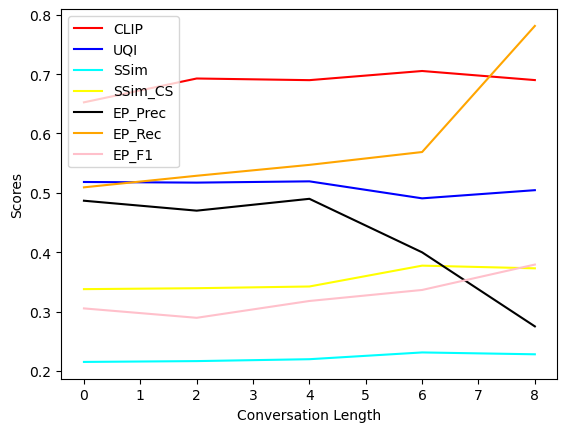

In [8]:
#!pip install matplotlib

import matplotlib.pyplot as plt

xs = [0, 2, 4, 6, 8]

plt.plot(xs, clip_means, color='red', label='CLIP')
#plt.plot(xs, psnr_means, color='magenta', label='PSNR')
#plt.plot(xs, brisque_means, color='green', label='Brisque')
plt.plot(xs, uqi_means, color='blue', label='UQI')
plt.plot(xs, ssim_means, color='cyan', label='SSim')
plt.plot(xs, ssim_cs_means, color='yellow', label='SSim_CS')
plt.plot(xs, ep_pr_means, color='black', label='EP_Prec')
plt.plot(xs, ep_re_means, color='orange', label='EP_Rec')
plt.plot(xs, ep_f1_means, color='pink', label='EP_F1')
plt.legend(loc="upper left")
plt.xlabel('Conversation Length', fontsize=10)
plt.ylabel('Scores', fontsize=10)
plt.show()

In [9]:
print(psnr_means)

[7.7369451546326395, 7.755316516769266, 7.836880434071172, 7.5672060971566095, 8.137024707192404]


In [10]:
print(brisque_means)

[22.0955106867713, 23.90000848688206, 24.436409306775644, 23.805564025355793, 22.505335926714537]
